In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['Attrition']=lb.fit_transform(df['Attrition'])

In [5]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [4]:
# Object Variables 
cols = df.select_dtypes(include = ['object']).columns
cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [5]:
for i in cols:
    df[i]=pd.Categorical(df[i]).codes

In [6]:
df[cols].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,2,2,1,0,7,2,0,1
1,1,1,1,1,6,1,0,0
2,2,1,4,1,2,2,0,1
3,1,1,1,0,6,1,0,1
4,2,1,3,1,2,1,0,0


In [7]:
x = df.drop('Attrition', axis=1).values
y = df['Attrition'].values

In [8]:
x.shape
y.shape

(1470, 34)

(1470,)

In [9]:
# train & test Split
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Creating a function to check the performamnce of each model 
def print_score(clf, xtr, xts, ytr, yts, train=True):
    clf.fit(xtr, ytr)
    if train:
        print('Training Performance of the model')
        print('Accuracy Score')
        print('{0:.4f}:'.format(accuracy_score(ytr, clf.predict(xtr))), '\n')
        print('Confusion Matix')
        print(confusion_matrix(ytr, clf.predict(xtr)), '\n')
        print('Classification Report')
        print('{}'.format(classification_report(ytr, clf.predict(xtr))), "\n")
        
        result = cross_val_score(clf, xtr, ytr, cv=10, scoring='accuracy')
        print('Avg. accuracy of CV is \t : {0:.4f}'.format(result.mean()))
        print('Std. Dev of accuracy of CV is : {0:.4f}'.format(result.std()))
    elif train==False:
        print('Testing Performance of the model')
        print('Accuracy Score')
        print('{0:.4f}:'.format(accuracy_score(yts, clf.predict(xts))), '\n')
        print('Confusion Matix')
        print(confusion_matrix(yts, clf.predict(xts)), '\n')
        print('Classification Report')
        print('{}'.format(classification_report(yts, clf.predict(xts))), "\n")
        


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)


In [61]:
print_score(clf_dt, xtr, xts, ytr, yts, train=True)

Training Performance of the model
Accuracy Score
1.0000: 

Confusion Matix
[[978   0]
 [  0 198]] 

Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       978
          1       1.00      1.00      1.00       198

avg / total       1.00      1.00      1.00      1176
 

Avg. accuracy of CV is 	 : 0.7781
Std. Dev of accuracy of CV is : 0.0310


In [62]:
print_score(clf_dt, xtr, xts, ytr, yts, train=False)

Testing Performance of the model
Accuracy Score
0.7653: 

Confusion Matix
[[218  37]
 [ 32   7]] 

Classification Report
             precision    recall  f1-score   support

          0       0.87      0.85      0.86       255
          1       0.16      0.18      0.17        39

avg / total       0.78      0.77      0.77       294
 



# Bagging

In [49]:
from sklearn.ensemble import BaggingClassifier
clf_bg =  BaggingClassifier(base_estimator=clf_dt, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42 )

In [63]:
print_score(clf_bg, xtr, xts, ytr, yts, train=True)

Training Performance of the model
Accuracy Score
1.0000: 

Confusion Matix
[[978   0]
 [  0 198]] 

Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       978
          1       1.00      1.00      1.00       198

avg / total       1.00      1.00      1.00      1176
 

Avg. accuracy of CV is 	 : 0.8589
Std. Dev of accuracy of CV is : 0.0177


In [51]:
print_score(clf_bg, xtr, xts, ytr, yts, train=False)

Testing Performance of the model
Accuracy Score
0.8639: 

Confusion Matix
[[248   7]
 [ 33   6]] 

Classification Report
             precision    recall  f1-score   support

          0       0.88      0.97      0.93       255
          1       0.46      0.15      0.23        39

avg / total       0.83      0.86      0.83       294
 



# Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [56]:
print_score(rf_clf, xtr, xts, ytr, yts, train=True)

Training Performance of the model
Accuracy Score
0.9796: 

Confusion Matix
[[978   0]
 [ 24 174]] 

Classification Report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       978
          1       1.00      0.88      0.94       198

avg / total       0.98      0.98      0.98      1176
 



In [57]:
print_score(rf_clf, xtr, xts, ytr, yts, train=False)

Testing Performance of the model
Accuracy Score
0.8673: 

Confusion Matix
[[250   5]
 [ 34   5]] 

Classification Report
             precision    recall  f1-score   support

          0       0.88      0.98      0.93       255
          1       0.50      0.13      0.20        39

avg / total       0.83      0.87      0.83       294
 



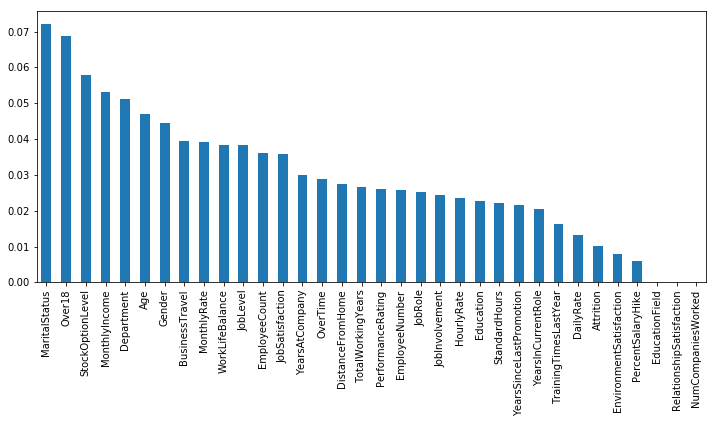

In [68]:
pd.Series(rf_clf.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False).plot(kind='bar', figsize=(12,5))

# Adaboost 

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
ada_clf = AdaBoostClassifier()

In [72]:
print_score(ada_clf, xtr, xts, ytr, yts, train=True)

Training Performance of the model
Accuracy Score
0.9048: 

Confusion Matix
[[962  16]
 [ 96 102]] 

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.98      0.94       978
          1       0.86      0.52      0.65       198

avg / total       0.90      0.90      0.89      1176
 

Avg. accuracy of CV is 	 : 0.8716
Std. Dev of accuracy of CV is : 0.0193


In [73]:
print_score(ada_clf, xtr, xts, ytr, yts, train=False)

Testing Performance of the model
Accuracy Score
0.8673: 

Confusion Matix
[[243  12]
 [ 27  12]] 

Classification Report
             precision    recall  f1-score   support

          0       0.90      0.95      0.93       255
          1       0.50      0.31      0.38        39

avg / total       0.85      0.87      0.85       294
 



# Adaboost with randomForest

In [74]:
ada_rf_clf = AdaBoostClassifier(RandomForestClassifier())

In [75]:
print_score(ada_rf_clf, xtr, xts, ytr, yts, train=True)

Training Performance of the model
Accuracy Score
1.0000: 

Confusion Matix
[[978   0]
 [  0 198]] 

Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       978
          1       1.00      1.00      1.00       198

avg / total       1.00      1.00      1.00      1176
 

Avg. accuracy of CV is 	 : 0.8376
Std. Dev of accuracy of CV is : 0.0205


In [76]:
print_score(ada_rf_clf, xtr, xts, ytr, yts, train=False)

Testing Performance of the model
Accuracy Score
0.8810: 

Confusion Matix
[[255   0]
 [ 35   4]] 

Classification Report
             precision    recall  f1-score   support

          0       0.88      1.00      0.94       255
          1       1.00      0.10      0.19        39

avg / total       0.90      0.88      0.84       294
 



In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

In [78]:
print_score(gb_clf, xtr, xts, ytr, yts, train=True)

Training Performance of the model
Accuracy Score
0.9583: 

Confusion Matix
[[976   2]
 [ 47 151]] 

Classification Report
             precision    recall  f1-score   support

          0       0.95      1.00      0.98       978
          1       0.99      0.76      0.86       198

avg / total       0.96      0.96      0.96      1176
 

Avg. accuracy of CV is 	 : 0.8665
Std. Dev of accuracy of CV is : 0.0229


In [79]:
print_score(gb_clf, xtr, xts, ytr, yts, train=False)

Testing Performance of the model
Accuracy Score
0.8878: 

Confusion Matix
[[248   7]
 [ 26  13]] 

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.97      0.94       255
          1       0.65      0.33      0.44        39

avg / total       0.87      0.89      0.87       294
 



In [11]:
import py-xgboost as xbg

SyntaxError: invalid syntax (<ipython-input-11-ad7599252227>, line 1)